To use datasets make sure you installed mnist_synthetic with torch:
- `poetry add mnist_synthetic --with torch`

# Dataset

In [2]:
from matplotlib import pyplot as plt

from mnist_synthetic.torch.datasets import MNISTSynthetic

Set seed=<num> and every run you will get same result

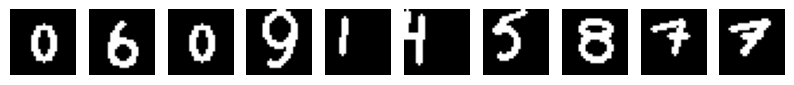

In [4]:
dataset = MNISTSynthetic(10, seed=42)

fig, axes = plt.subplots(1, 10, figsize=(10, 4))
for i, ax in enumerate(axes):
    ax.imshow(dataset[i][0], cmap='gray')
    ax.axis('off')
    ax.set_label(str(dataset[i][1]))

Set seed=None and every run will be random

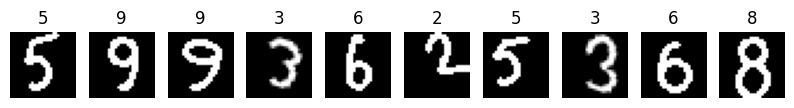

In [11]:
dataset = MNISTSynthetic(10, seed=None)

fig, axes = plt.subplots(1, 10, figsize=(10, 4))
for i, ax in enumerate(axes):
    ax.imshow(dataset[i][0], cmap='gray')
    ax.axis('off')
    ax.set_title(str(dataset[i][1]))

# Rotate dataset

By default Rotate dataset first set number to center, and after rotate the image

In [1]:
from matplotlib import pyplot as plt
from mnist_synthetic.torch.datasets import MNISTSyntheticRotate

By default is INTER_NEAREST resampling

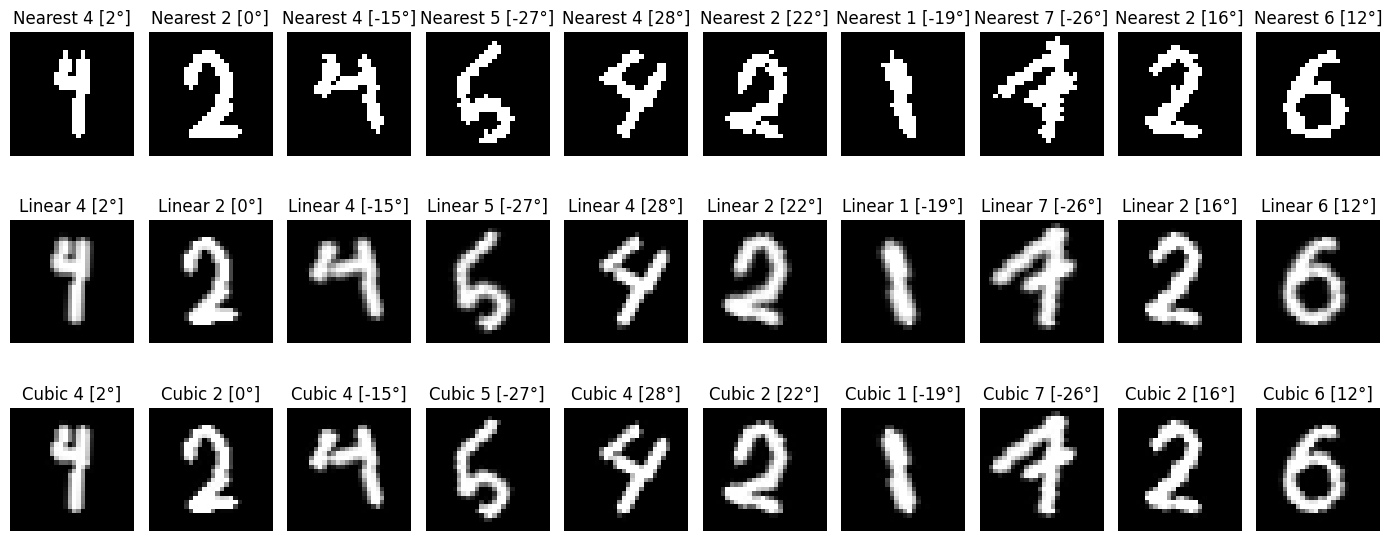

In [6]:
import cv2

datasets = {
    'Nearest': MNISTSyntheticRotate(10, max_angle=30, seed=1),
    'Linear': MNISTSyntheticRotate(10, max_angle=30, seed=1, resample=cv2.INTER_LINEAR),
    'Cubic': MNISTSyntheticRotate(10, max_angle=30, seed=1, resample=cv2.INTER_CUBIC)
}

fig, axes = plt.subplots(3, 10, figsize=(14, 6))
for i, (key, dataset) in enumerate(datasets.items()):
    for j, ax in enumerate(axes[i]):
        img, label, angle = dataset[j]
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        ax.set_title(f'{key} {label} [{angle}°]')
_ = fig.tight_layout()

For validation you can use MNISTSyntheticRotated (rotate images while generation and not change it in `__getitem__` method)

In [1]:
from matplotlib import pyplot as plt
from mnist_synthetic.torch.datasets import MNISTSyntheticRotated

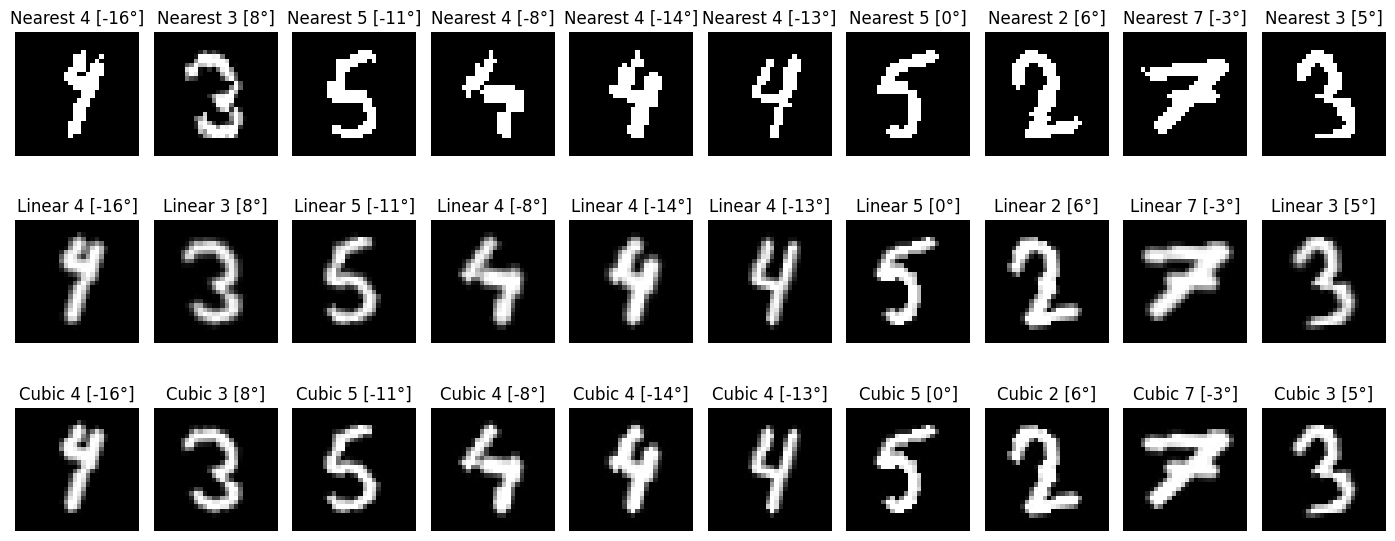

In [3]:
import cv2

datasets = {
    'Nearest': MNISTSyntheticRotated(10, max_angle=30, seed=1),
    'Linear': MNISTSyntheticRotated(10, max_angle=30, seed=1, resample=cv2.INTER_LINEAR),
    'Cubic': MNISTSyntheticRotated(10, max_angle=30, seed=1, resample=cv2.INTER_CUBIC)
}

fig, axes = plt.subplots(3, 10, figsize=(14, 6))
for i, (key, dataset) in enumerate(datasets.items()):
    for j, ax in enumerate(axes[i]):
        img, label, angle = dataset[j]
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        ax.set_title(f'{key} {label} [{angle}°]')
_ = fig.tight_layout()

The main difference that MNISTSyntheticRotated rotates while generation of images

In [4]:
datasets['Nearest'].extra

[{'angle': np.int64(-16)},
 {'angle': np.int64(8)},
 {'angle': np.int64(-11)},
 {'angle': np.int64(-8)},
 {'angle': np.int64(-14)},
 {'angle': np.int64(-13)},
 {'angle': np.int64(0)},
 {'angle': np.int64(6)},
 {'angle': np.int64(-3)},
 {'angle': np.int64(5)}]